## Project: Investigate a Dataset

Project rubric:
https://review.udacity.com/#!/rubrics/107/view

Submission:
What to include in your submission
1. A PDF or HTML file containing your analysis. This file should include:
1. A note specifying which dataset you analyzed
1. A statement of the question(s) you posed
1. A description of what you did to investigate those questions
1. Documentation of any data wrangling you did
1. Summary statistics and plots communicating your final results
1. Code you used to perform your analysis. If you used an Jupyter notebook, you can submit your .ipynb. Otherwise, you 1. should submit the code separately in .py file(s).
1. A list of Web sites, books, forums, blog posts, github repositories, etc. that you referred to or used in creating your submission (add N/A if you did not use any such resources).

Data dictionary:
https://www.kaggle.com/c/titanic/data

### Introduction
I've chosen the titanic dataset to work in this project and using the additional facts found on the internet [I've captured some of them below], I used this sample dataset to compare the survival rate against different grouping of the passengers. The goal would be to identify which passenger group have the highest chance to survive.
Based on what I've read in a wiki article, I've divided the groups into men, women and child (age < 18) and also by the ticket class since this grouping makes logical sense to me.

##### Interesting facts:
1. Titanic Passengers. 3,547 - the maximum capacity of the RMS Titanic when fully loaded with passengers and crew. 2,222 - the total number of people on board (passengers and crew).
1. The Titanic originally was designed to carry 64 lifeboats. To save from cluttering decks, the ship ended up carrying 20 on her maiden voyage. 9. Only 706 passengers and crew would survive the disaster.
1. The ship could have stayed afloat had only four compartments flooded... Five became flooded. 1,503 people total died, including passengers and crew. One of the first lifeboats to leave the Titanic carried only 28 people; it could have held 64 people.
1. The number of casualties of the sinking is unclear, due to a number of factors. These include confusion over the passenger list, which included some names of people who cancelled their trip at the last minute, and the fact that several passengers travelled under aliases for various reasons and were therefore double-counted on the casualty lists.[207] The death toll has been put at between 1,490 and 1,635 people
1. The last living survivor, Millvina Dean from England, who at only nine weeks old was the youngest passenger on board, died aged 97 on 31 May 2009

##### Sources
1. www.titanicfacts.net/titanic-passengers.html
1. http://archive.jsonline.com/entertainment/100-unsinkable-facts-about-the-titanic-2t4psu6-147436195.html
1. https://en.wikipedia.org/wiki/RMS_Titanic

##### Technical References
1. https://eazybi.com/blog/data_visualization_and_chart_types/
1. https://stackoverflow.com/questions/29498652/plot-bar-graph-from-pandas-dataframe
1. https://stackoverflow.com/questions/42784930/how-to-plot-a-dataframe-grouped-by-two-columns-in-matplotlib-and-pandas
1. https://www.w3schools.com/colors/colors_picker.asp
1. https://stackoverflow.com/questions/11244514/modify-tick-label-text


### Questions
1. Which group has the highest survival rate?
1. Which group in the Ticket class have the highest survival rate?
1. Which group amongst men, women and children (age <= 18) have the highest survival rate?

In [2]:
import pandas as pd

# pointing to the data file folder
import os.path
mypath = '/home/nbuser/'
os.chdir(mypath)

# checking the file layout
filename = 'titanic-data.csv'
titanic_df = pd.read_csv(filename)
print 'sample size:', len(titanic_df)
titanic_df.head()


sample size: 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Wrangling
1. To create the additional column for children (age < 18), I first need to first clean up any none integer values.
1. As there are many passengers that didn't have a proper age value, I had to assume by replacing them with the mean age of the dataset.
1. Before replacing the NaN value, let's start by checking how big of a portion are such that data so that I know how much data that I'm affecting.


In [3]:
# Age data in the set consists of NaN
empty_values = len(titanic_df[titanic_df['Age'].isnull()])

# check for percentages of modified data
print float(empty_values) / float(len(titanic_df)) * 100

# get the average age for the data set
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

# check again to ensure no more NaN value for age
titanic_df[titanic_df['Age'].isnull()]

# adding IsAdult flag column
titanic_df['IsAdult'] = titanic_df['Age'] > 18

titanic_df.head()


19.8653198653


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsAdult
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True


### Note
1. So a big portion, 19.86% of the data was modified for the above assumption. This unfortunately will skew most of the data for the age analysis later.

### Start by getting the descriptive stats for the groups for initial comparison
1. So I start by exploring the stats for the different group to see if there's any clear pattern at this stage.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.set(color_codes=True)
%pylab inline

/home/nbuser/anaconda2_410/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [5]:
def autolabel(ax, values):
    rects = ax.patches
    # Now make some labels
    labels = ["%d" % i for i in (values)]

    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height*1.01, label, ha='center', va='bottom')
        
def rename_xticks(ax, title):
    # Overwrite the xticks value for survival
    if title=='Survival':
        labels = ['','Perished','', 'Survived']
        ax.set_xticklabels(labels)
    elif title=='Survived':
        labels = ['Perished','Survived']
        ax.set_xticklabels(labels)
    elif title=='Ticket Class':
        labels = ['','First','', 'Second', '', 'Third']
        ax.set_xticklabels(labels)
    elif title=='Pclass':
        labels = ['First','Second', 'Third']
        ax.set_xticklabels(labels)
        
def plothist(title, fig, position, df, color, bins=8):
    ax = fig.add_subplot(2, 3, position)
    ax.set_title(title + ' of Passengers', y=1.08)
    ax.set(xlabel=title, ylabel="Count")
    
    values = ax.hist(df, color=color, bins=bins);
    autolabel(ax, values[0])
    
    rename_xticks(ax, title)

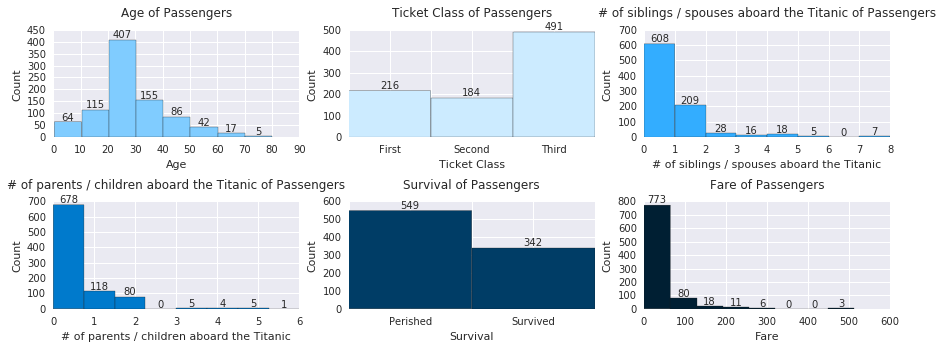

In [6]:
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(hspace=.6)

plothist('Age', fig, 1, titanic_df['Age'], '#80ccff')
plothist('Ticket Class', fig, 2, titanic_df['Pclass'], '#ccebff', bins=[1,2,3,4])
plothist('# of siblings / spouses aboard the Titanic', fig, 3, titanic_df['SibSp'], '#33adff')
plothist('# of parents / children aboard the Titanic', fig, 4, titanic_df['Parch'], '#007acc')
plothist('Survival', fig, 5, titanic_df['Survived'], '#003d66', bins=[0,1,2])
plothist('Fare', fig, 6, titanic_df['Fare'], '#001f33')


In [7]:
survival_pct = 549/891. * 100
print round(survival_pct,2),'%'

61.62 %


### Data Overview
Let's begin by analysing the data across a few of the categories. I've looked at all the categories which includes numerical values to start the analysis.

1. In terms of age, majority of the passengers, 407, are within the 20 to 30 age range.
1. From ticket class perspective, the majority of passengers are in the third class, 491 person.
1. Looking at no of siblings or spouses aboard, the majority have 0 siblings or spouse onboard, 608 person. 
    1. There appears to be 7 people with 7 siblings or spouses onboard, and it would have been rather unfortunate if it was indeed the case that the 7 person onboard were actually family.
1. This coincide with the data that shows number of parents or children abord, which are around 678 person.
1. Unfortunately, the majority of the passengers didn't survive the trip with a death rate of 549.
    1. That is 61.62 % of all the sample passengers onboard.
1. It would appears that the ticket class doesn't match exactly with the fare paid as majority of passengers, 773, paid up to 50 pounds for the ticket but there are only 491 passengers in the third class ticket. 
    1. Three passengers appear to have paid 500 pounds to be board this ship.


### Limitation
Before proceeding further, let's look at some limitation and assumptions that we have with the current data.

1. We don't know how the sample was selected from the original population, hence there could already be some bias in the data. So the assumption here is that the sample data set should be random enough so that our analysis can still be carried out.
1. We don't have all the correct values for age in this data set, in fact 19.86% of it, hence we try to fill up the empty values using the mean to avoid skewing the data too much to the left or to the right.
    1. We could have probably done the same using the median value instead of the mean.
    1. Another possible value would be to replace it with 0, however that would have skewed the data towards the left which could impact the analysis for IsAdult later on.
    1. We could have also dropped the data with non integer age value, but as I'm interested to see how the other factors could impact my analysis, I've decided to keep these data.
1. Certain values are mixed into one category such as number of siblings and number of spouses, thus we wouldn't be able to make accurate assumptions about the data unless we're able to differentiate them clearly.
1. The same goes for the category of number of parents or children aboard, we wouldn't able to tell which is which correctly either.

Let's continue by looking at multiple variables comparison. We are interested to see which category correlates closer to the survival rate.

In [8]:
def rename_yticks(ax, title):
    if title=='Pclass':
        labels = ['','First','','Second','', 'Third']
        ax.set_yticklabels(labels)
    elif title=='Age':
        labels = ['','0','20','40','60','80', '100']
        ax.set_yticklabels(labels)
    elif title=='SibSp':
        labels = ['','0','2','4','6','8', '10']
        ax.set_yticklabels(labels)
    elif title=='Parch':
        labels = ['','0','1','2','3','4', '5','6','7']
        ax.set_yticklabels(labels)
    elif title=='Fare':
        labels = ['','0','100','200','300','400', '500', '600']
        ax.set_yticklabels(labels)
    elif title=='Survived':
        labels = ['','Perished','','','', '', 'Survived']
        ax.set_yticklabels(labels)

def plot_violin(df, x, y):
    f, ax = plt.subplots(figsize=(8, 8))

    # Show each distribution with both violins and points
    sns.violinplot(x=x, y=y, data=df, inner="box", palette="Set3", cut=0, linewidth=3)

    sns.despine(left=True)

    title = x + ' by ' + y
    f.suptitle(title, fontsize=18, fontweight='bold')
    ax.set_xlabel(x,size = 16,alpha=0.7)
    ax.set_ylabel(y,size = 16,alpha=0.7);
    #ax.set_ylim(0)
    
    rename_xticks(ax, x)
    rename_yticks(ax, y)

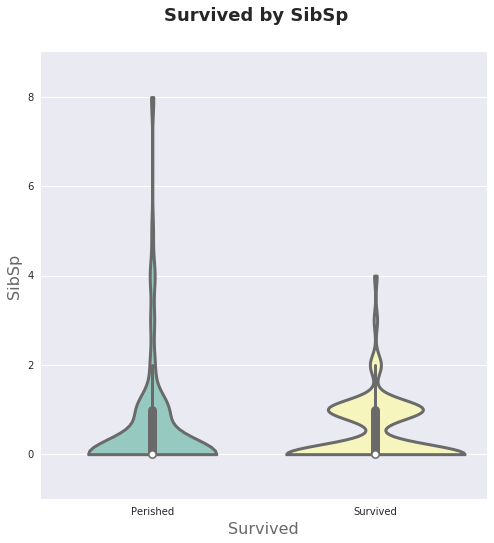

In [9]:
plot_violin(titanic_df,'Survived','SibSp')


### Survived by Siblings / Spouses aboard
1. For the non survivor group, a high majority of passengers have 0 siblings or spouses aboard.
1. For the survivor group, the highest majority are those with 0 siblings or spouses aboard.
    1. For this group, the passengers that have a sibling or a spouse aboard is higher than the non survivor group. Would be interesting to know if this somehow indirectly affected their survival rate 

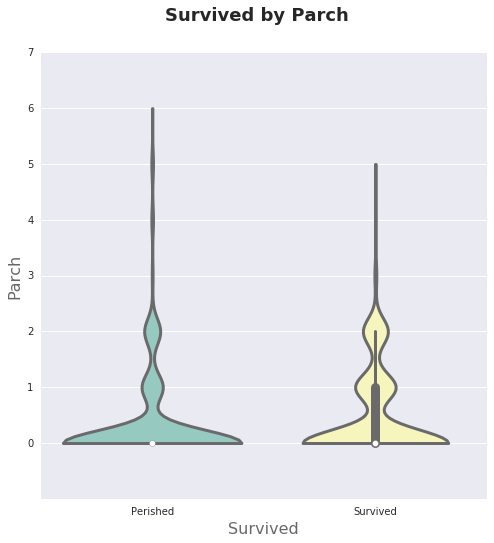

In [10]:
plot_violin(titanic_df,'Survived','Parch')

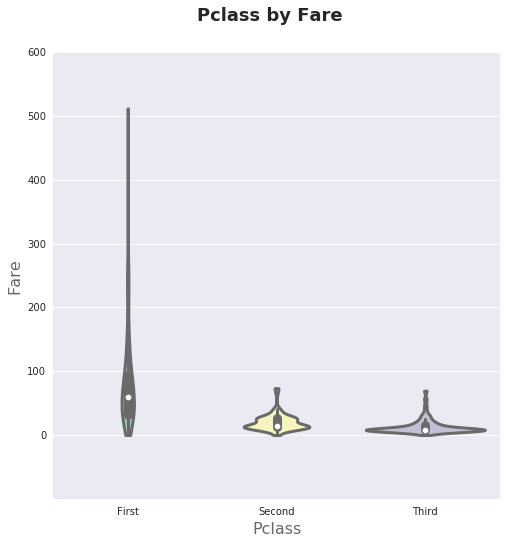

In [11]:
plot_violin(titanic_df,'Pclass','Fare')


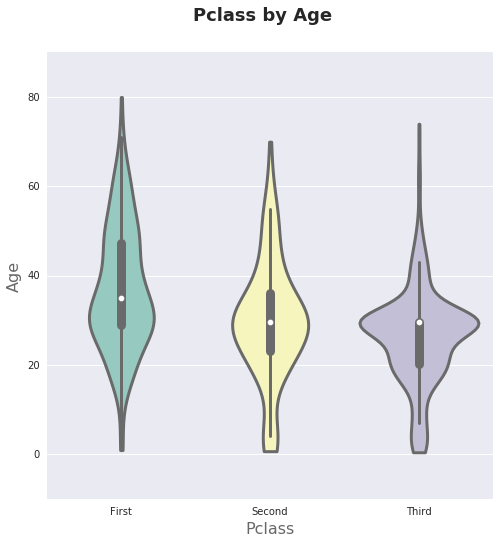

In [12]:
plot_violin(titanic_df,'Pclass','Age')


### Ticket class by Age
1. Not suprisingly, each ticket class has the highest concentration of passengers on the age range of 30.
1. And indeed, third class passengers has the highest number of passengers in that age group.

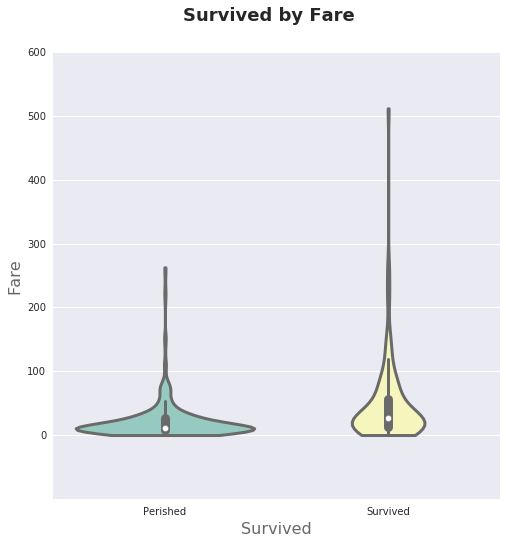

In [13]:
plot_violin(titanic_df,'Survived','Fare')

### Survived by Fare
1. Looking at the distrubution of the passengers by fare, we can see that a very high number of passengers that didn't survived paid less than 50 dollars.
    1. There is also a thin tail heading upwards to fares slightly lesser than 300 dollars.
1. While the survivor groups also have a majority in the less than 50 dollars fare paid and have an extremely long tail towards 500 dollars fare range.

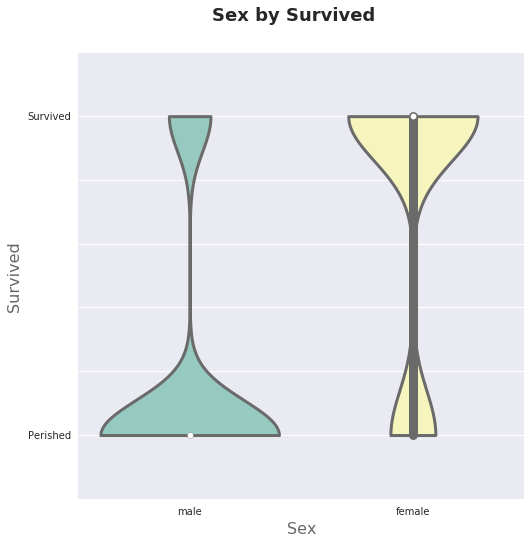

In [14]:
plot_violin(titanic_df,'Sex','Survived')

### Sex by Survived
1. The plot shows a big contrast in survival rate between the male and female groups.
1. A majority of the male group didn't survive whereas a bigger majority of the female group did survived.

In [ ]:
plot_violin(titanic_df,'Survived','Pclass')

### Survived by Ticket Class
1. Survival in the third class was the lowest and we can see the probability of non surviving goes lower as the passenger's ticket class move up from third class to the second and finally to 1st class.
1. In terms of those that did survived, the majority of the passengers were in the first class and the third class.

### Interim Summary
Based on the analysis above, it would appear that the most optimal passenger group that has the highest survival rate would be within the age range of 30, first class and a female person.
Let's dive deeper to get a closer understanding of the probabilities.

In [ ]:
def plot_stats_count(attributes, rotate=0):
    survival_tag = 'Survived'
    attr_list = []
    
    # check the parameter passed contains multiple values as this needs to be appended differently
    if isinstance(attributes, str):
        attr_list.append(attributes)
        xtitle = "Survival by " + attributes
    else:
        attr_list.extend(attributes)
        xtitle = "Survival by " + ','.join(attributes)
    attr_list.append(survival_tag)
    
    # group by the needed parameter and count no of rows and later the percentage by each sub group
    survivor_by_attr = titanic_df.groupby(attr_list)[survival_tag].agg({'Survival Count':'count'})
    
    survivor_by_attr_formatted = survivor_by_attr.unstack()
    display(survivor_by_attr_formatted)
    
    # Create a simple bar plot to show the stats
    
    ax = survivor_by_attr_formatted.plot(kind='bar', title = xtitle, figsize=(10, 5), legend=True, fontsize=12, rot=rotate,
                           color=['#ff4d4d', '#1aa3ff'])
    ax.set_ylabel("Survival count", fontsize=12)
    ax.plot()
    
    return survivor_by_attr

def plot_stats_percentage(attributes, survivor_by_attr, rotate=0):
    survivor_pcts = survivor_by_attr.groupby(level=0).apply(lambda x: 
                                                            100*x / float(x.sum())).unstack()['Survival Count']     
    display(survivor_pcts)
   
    # Create a simple bar plot to show the stats
    if isinstance(attributes, str):
        xtitle = "Survival by " + attributes
    else:
        xtitle = "Survival by " + ','.join(attributes)
    
    ax = survivor_pcts.plot(kind='bar', title = xtitle, figsize=(10, 5), legend=True, fontsize=12, rot=rotate,
                           color=['#ff4d4d', '#1aa3ff'])
    ax.set_ylabel("Survival %", fontsize=12)
    ax.plot()
    
    return survivor_pcts

In [ ]:
survivor_by_attr = plot_stats_count('Pclass')

In [ ]:
survivor_by_attAr_pct = plot_stats_percentage('Pclass', survivor_by_attr)

### Survival by Ticket Class
1. Passengers in the first class has the highest survival rate of 62.96% against death rate of 37.03%.
2. Passengers in the second class has an almost equal survival rate of 52.71% surviving vs 47.28% of not surviving.
3. The chances of surviving in the third class is less than a quarter, 24.24% of the non surviving percentage, 75.76%.

In [ ]:
survivor_by_attr = plot_stats_count('Sex')

In [ ]:
survivor_by_attr_pct = plot_stats_percentage('Sex', survivor_by_attr)

### Survival according to gender
1. Female passengers have the highest rate of survival 74.2% against death rate of 25.8%
1. Chances of the survival for a female passenger is almost 3 times the chances of not surviving.
1. For a male passenger however the chances of survival is rather slim at 18.9% against 81.11%

In [ ]:
survivor_by_attr = plot_stats_count('IsAdult')

In [ ]:
survivor_by_attr_pct = plot_stats_percentage('IsAdult', survivor_by_attr)

### Survival according to age
1. A child has a slightly higher survival rate of 50.36% against the death rate of 49.64%. 
    1. However this data might be a little off due to the NaN data which was replaced with the mean value of this sample data set.
1. The chances of survival for an adult is 36.17% as compared to non surviving at 63.83%.

### Subsequent finding
1. So it appears that first class has the highest chances of survival with 62.96%
2. Female have a higher chances of survival at 74.2%
3. Children have a slight edge in survival rate with 50.36% of surviving.

### Next
1. Let's check on combination of the factors to see out of the three attributes given above, which combination have the highest survival rate

In [ ]:
factors1 = ['Sex','Pclass']
survivor_by_attr = plot_stats_count(factors1)

In [ ]:
survivor_by_attr_pct = plot_stats_percentage(factors1, survivor_by_attr)

### Survival according to gender and ticket class
1. A female in the first class has the highest chance of surviving with 29% out of the group of survivors.
1. A female in second and third class has the second highest chance of surviving with 22.29% and 22.93% respectively out of the whole survivor group.
1. A female passenger in the third class has an almost 50/50 chance of surviving.
1. A male passenger in the third class has the lowest chances of survival with a high mortality rate of 52% more than half of all the non surviving passenger group.
1. The survival rate for a male passenger in the first class and the third class is close enough (7.8% vs 8.15%), however comparing the non survival rate then we can see a huge discrepancies of 13.34% vs 52% of death for first class against third class.

In [ ]:
factors2 = ['IsAdult','Pclass']
survivor_by_attr = plot_stats_count(factors2)

In [ ]:
survivor_by_attr_pct = plot_stats_percentage(factors2, survivor_by_attr)

### Survival by Adult, Ticket class
1. It would appears that an adult in the first class has a higher chance of survival, with almost 10x the survival vs non survival probability.
1. The mortality rate is the highest for the third class regardles of adult or child with mortality rate of 42.88% and 41.35% respectively out of the group of non survivors.

In [ ]:
factors3 = ['Sex','IsAdult']
survivor_by_attr = plot_stats_count(factors3)

In [ ]:
survivor_by_attr_pct = plot_stats_percentage(factors3, survivor_by_attr)

### Survival by Sex, IsAdult
1. A female adult shows high chances of surviving with 59.6% out of the group of survivors.
1. A male adult has the lowest chance of surviving with percentage occupying 72.96% out of the non survivors group.


### Third round of Finding
1. Based on this round of analysis, being a female adult with a first class ticket shows clear advantage of surviving.
1. Now let's put all the graph together to a side by side comparison.


In [ ]:
factors4 = ['Sex','IsAdult','Pclass']
survivor_by_attr = plot_stats_count(factors4, 90)

In [ ]:
survivor_by_attr_pct = plot_stats_percentage(factors4, survivor_by_attr, 90)

In [ ]:
pct_surviving = 81/83. * 100
print pct_surviving

### Conclusion
1. Adult female from the first class has the highest survival rate of 25.79% out of the survivor group.
    1. The mortality rate for a passenger in this group is at a low 0.64% out of the non survivor group.
1. Followed by adult female from the second class, 17.83%.
1. This is continuted by adult female from the third class with 15.92%.
1. Adult male in the third class has the lowest chance of surviving with a mortality rate of 45.06% out of the non survivors group.
1. This is followed by the adult female in the third class, due to the third class being the largest group in this sample set. 

So if the group with the highest chance of survival based on the analysis of the three factors of is adult, gender and ticket class would be the adult female first class ticket holder group that has a 81 out of 83 chance or about 97.58% of surviving.